#Imputation with Prediction

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shihuitay/heart_diesease_ml-dataset/main/heart.csv',  index_col=0) # the cleaned dataset from Part 1

In [3]:
df_ori = df.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0.0,1,0
1,67,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3.0,0,1
2,67,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,0,0
4,41,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0.0,0,0


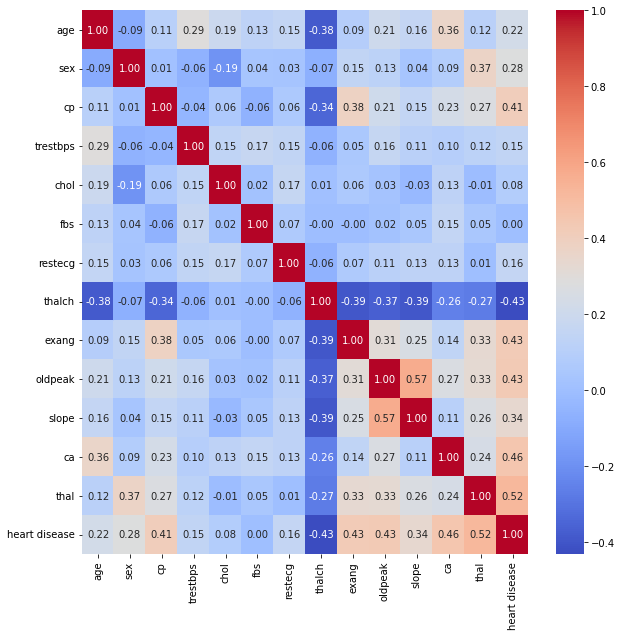

In [4]:
# Remove the unknown values from 'ca', 'thal' and 'slope' columns and examine their correlation with other columns
df2 = df[df.ca != 4][df.slope != 3][df.thal != 3]
corr = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap= 'coolwarm')
plt.show()

'ca' has strong correlation with 'heart disease' and 'age'<br>
'slope' has strong correlation with 'oldpeak', 'thalch' and 'heart disease'<br>
'thal' has strongest correlation with 'heart disease', 'sex', 'exang', 'oldpeak'<br>
so we will try to use these features to predict the missing values.<br>
<br>
### Impute missing values with predictions (slope)

In [5]:
#@title

import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm

def random_forest_ml(x_train, y_train, x_test, y_test):
  model = RandomForestClassifier(n_estimators = 200, max_depth = 200, random_state = 42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  print("Random Forst Accuracy Score: \t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))


def svm_ml(x_train, y_train, x_test, y_test):
  model = svm.SVC(kernel='linear', C=1.0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("SVM Accuracy Score: \t\t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))

df_missing_slope = df_ori[df_ori.slope == 3]
df_no_missing_slope = df_ori[df_ori.slope != 3]
df_train, df_test = train_test_split(df_no_missing_slope, test_size = 0.5)

y_train = np.array(df_train['slope'])
x_train = np.array(df_train[['oldpeak']])
x_train2 = np.array(df_train[['oldpeak', 'thalch']])
x_train3 = np.array(df_train[['oldpeak', 'thalch', 'heart disease']])
x_train4 = np.array(df_train.drop('slope', axis=1))

y_test = np.array(df_test['slope'])
x_test = np.array(df_test[['oldpeak']])
x_test2 = np.array(df_test[['oldpeak', 'thalch']])
x_test3 = np.array(df_test[['oldpeak', 'thalch', 'heart disease']])
x_test4 = np.array(df_test.drop('slope', axis=1))

print("Prediction with 'oldpeak' as feature")
random_forest_ml(x_train, y_train, x_test, y_test)
svm_ml(x_train, y_train, x_test, y_test)
print("\nPrediction with 'oldpeak' and 'thalch' as features")
random_forest_ml(x_train2, y_train, x_test2, y_test)
svm_ml(x_train2, y_train, x_test2, y_test)
print("\nPrediction with 'oldpeak', 'thalch' and 'heart disease' as features")
random_forest_ml(x_train3, y_train, x_test3, y_test)
svm_ml(x_train3, y_train, x_test3, y_test)
print("\nPrediction with all features")
random_forest_ml(x_train4, y_train, x_test4, y_test)
svm_ml(x_train4, y_train, x_test4, y_test)

Prediction with 'oldpeak' as feature
Random Forst Accuracy Score: 	69.37%
SVM Accuracy Score: 		66.79%

Prediction with 'oldpeak' and 'thalch' as features
Random Forst Accuracy Score: 	59.41%
SVM Accuracy Score: 		71.96%

Prediction with 'oldpeak', 'thalch' and 'heart disease' as features
Random Forst Accuracy Score: 	66.42%
SVM Accuracy Score: 		73.80%

Prediction with all features
Random Forst Accuracy Score: 	73.06%
SVM Accuracy Score: 		72.69%


Anything below 80% is not good so we decide not to impute the missing values with predictions as it will introduce noises to our models.<br>
<br>
### Impute missing values with predictions (ca)

In [ ]:
#@title

# Compare the Random Forest Models with using different features for 'ca' column
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def random_forest_ml(x_train, y_train, x_test, y_test):
  model = RandomForestClassifier(n_estimators = 200, max_depth = 200, random_state = 42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("Random Forest Accuracy Score: \t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))
  
def svm_ml(x_train, y_train, x_test, y_test):
  model = svm.SVC(kernel='linear', C=1.0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("SVM Accuracy Score: \t\t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))

df_missing_ca = df_ori[df_ori.ca == 4]
df_no_missing_ca = df_ori[df_ori.ca != 4]
df_train, df_test = train_test_split(df_no_missing_ca, test_size = 0.5)

y_train = np.array(df_train['ca'])
x_train = np.array(df_train[['heart disease']])
x_train2 = np.array(df_train[['heart disease', 'age']])
x_train3 = np.array(df_train.drop('ca', axis=1))

y_test = np.array(df_test['ca'])
x_test = np.array(df_test[['heart disease']])
x_test2 = np.array(df_test[['heart disease', 'age']])
x_test3 = np.array(df_test.drop('ca', axis=1))

print("Prediction with 'heart disease' feature")
random_forest_ml(x_train, y_train, x_test, y_test)
svm_ml(x_train, y_train, x_test, y_test)
print("\nPrediction with 'heart disease' and 'age' features")
random_forest_ml(x_train2, y_train, x_test2, y_test)
svm_ml(x_train2, y_train, x_test2, y_test)
print("\nPrediction with all features")
random_forest_ml(x_train3, y_train, x_test3, y_test)
svm_ml(x_train3, y_train, x_test3, y_test)

Prediction with 'heart disease' feature
Random Forest Accuracy Score: 	56.58%
SVM Accuracy Score: 		56.58%

Prediction with 'heart disease' and 'age' features
Random Forest Accuracy Score: 	52.63%
SVM Accuracy Score: 		56.58%

Prediction with all features
Random Forest Accuracy Score: 	64.47%
SVM Accuracy Score: 		63.16%


Same conclusion, we can't get more than 75% accuracy so we decide not to impute the missing values with predictions as it will introduce noises to our models.<br>
<br>
### Impute missing values with predictions (thal)

In [ ]:
#@title

# Compare the Random Forest Models with using different features for 'thal' column
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def random_forest_ml(x_train, y_train, x_test, y_test):
  model = RandomForestClassifier(n_estimators = 200, max_depth = 200, random_state = 42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("Random Forst Accuracy Score: \t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))
  
def svm_ml(x_train, y_train, x_test, y_test):
  model = svm.SVC(kernel='linear', C=1.0)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print("SVM Accuracy Score: \t\t%.2f%%" % (accuracy_score(y_test, y_pred) * 100))

df_missing_thal = df_ori[df_ori.thal == 3]
df_no_missing_thal = df_ori[df_ori.thal != 3]
df_train, df_test = train_test_split(df_no_missing_thal, test_size = 0.5)

y_train = np.array(df_train['thal'])
x_train = np.array(df_train[['heart disease']])
x_train2 = np.array(df_train[['heart disease', 'sex']])
x_train3 = np.array(df_train[['heart disease', 'sex', 'exang']])
x_train4 = np.array(df_train.drop('thal', axis=1))

y_test = np.array(df_test['thal'])
x_test = np.array(df_test[['heart disease']])
x_test2 = np.array(df_test[['heart disease', 'sex']])
x_test3 = np.array(df_test[['heart disease', 'sex', 'exang']])
x_test4 = np.array(df_test.drop('thal', axis=1))

print("Prediction with 'heart disease' feature")
random_forest_ml(x_train, y_train, x_test, y_test)
svm_ml(x_train, y_train, x_test, y_test)
print("\nPrediction with 'heart disease' and 'sex' features")
random_forest_ml(x_train2, y_train, x_test2, y_test)
svm_ml(x_train2, y_train, x_test2, y_test)
print("\nPrediction with 'heart disease', 'sex' and 'exang' features")
random_forest_ml(x_train3, y_train, x_test3, y_test)
svm_ml(x_train3, y_train, x_test3, y_test)
print("\nPrediction with all features")
random_forest_ml(x_train4, y_train, x_test4, y_test)
svm_ml(x_train4, y_train, x_test4, y_test)

Prediction with 'heart disease' feature
Random Forst Accuracy Score: 	66.83%
SVM Accuracy Score: 		66.83%

Prediction with 'heart disease' and 'sex' features
Random Forst Accuracy Score: 	66.83%
SVM Accuracy Score: 		66.83%

Prediction with 'heart disease', 'sex' and 'exang' features
Random Forst Accuracy Score: 	67.82%
SVM Accuracy Score: 		66.83%

Prediction with all features
Random Forst Accuracy Score: 	67.82%
SVM Accuracy Score: 		66.83%


Same conclusion, we can't get more than 75% accuracy so we decide not to impute the missing values with predictions as it will introduce noises to our models.


### Remove missing values

We can't impute the missing values for the 'ca', 'thal' and 'slope' columns, so we will remove the row and the columns

In [6]:
# Load the engineered dataset in which the continuous features had been scaled and categorical features had been one-hot encoded in Part 1 of this project
df_ml = pd.read_csv('https://raw.githubusercontent.com/shihuitay/heart_diesease_ml-dataset/main/heart_machine_learning.csv',  index_col=0)

In [7]:
# Check columns before removing
print(df_ml.columns)


Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'heart disease',
       'sex_0', 'sex_1', 'cp_3', 'cp_1', 'cp_2', 'cp_0', 'fbs_0', 'fbs_1',
       'restecg_2', 'restecg_0', 'restecg_1', 'exang_0', 'exang_1', 'slope_2',
       'slope_1', 'slope_3', 'slope_0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0',
       'ca_4.0', 'thal_1', 'thal_0', 'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
# Check number of rows before removing
print(len(df_ml))

772


In [8]:
# Remove rows contains missing values in 'ca', 'slope' and 'thal'
df_ml = df_ml[df_ml['ca_4.0'] != 1][df_ml.slope_3 != 1][df_ml.thal_3 != 1]

# Drop the columns
df_ml.drop(['slope_3', 'ca_4.0', 'thal_3'], axis=1, inplace=True)

# Check columns after removing
print(df_ml.columns)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'heart disease',
       'sex_0', 'sex_1', 'cp_3', 'cp_1', 'cp_2', 'cp_0', 'fbs_0', 'fbs_1',
       'restecg_2', 'restecg_0', 'restecg_1', 'exang_0', 'exang_1', 'slope_2',
       'slope_1', 'slope_0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_1',
       'thal_0', 'thal_2'],
      dtype='object')


In [ ]:
# Check number of rows afer removing
print(len(df_ml))

299


In [ ]:
# The dataset with missing values removed
df_ml.head()

,age,trestbps,chol,thalch,oldpeak,heart disease,sex_0,sex_1,cp_3,cp_1,cp_2,cp_0,fbs_0,fbs_1,restecg_2,restecg_0,restecg_1,exang_0,exang_1,slope_2,slope_1,slope_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1,thal_0,thal_2
0,1.052551,0.742169,0.083947,0.438890,1.446854,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1.476537,1.631331,0.878638,-1.189416,0.643928,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2,1.476537,-0.739767,0.023970,-0.375263,1.747951,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.703359,-0.146993,0.338848,1.873351,2.651243,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,-1.279373,-0.146993,-0.350884,1.291813,0.543562,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0


#Exploratory Data Analysis

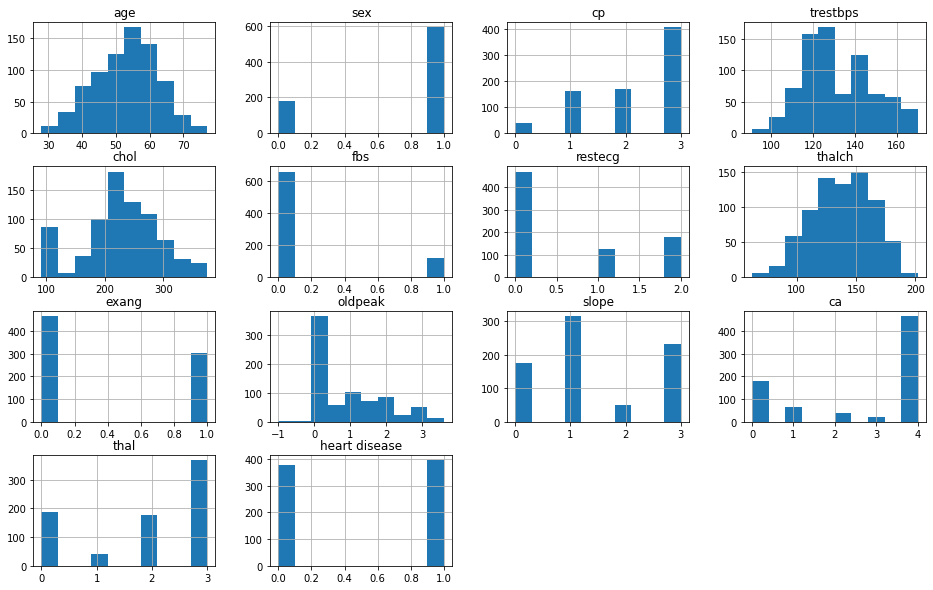

In [ ]:
# Use the cleaned dataset from Part 1 
# Plot the distribution of each feature
rcParams['figure.figsize'] = 16, 10
df.hist()
warnings.filterwarnings('ignore')

We have 13 predictive variables (five continuous and eight categorical) and one dependent variable. Each continuous variable has a different range of distribution. Hence, feature scaling (which had been done in Part 1 of this project) prior to machine learning modeling is essential.

In [ ]:
df['heart disease'].value_counts()

1    396
0    376
Name: heart disease, dtype: int64

Text(0.5, 1.0, 'Presence of Heart Disease')

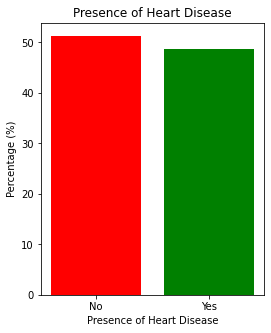

In [ ]:
# Plot a bar chart showing  the percentage of patients with and without heart disease
plt.figure(figsize=(4,5))
plt.bar(df['heart disease'].unique(), df['heart disease'].value_counts()*100/(len(df)), color = ['red', 'green'])
plt.xticks([0, 1], labels=['No', 'Yes'])
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Percentage (%)')
plt.title('Presence of Heart Disease')

Heart disease patients made up nearly 50% of the dataset.

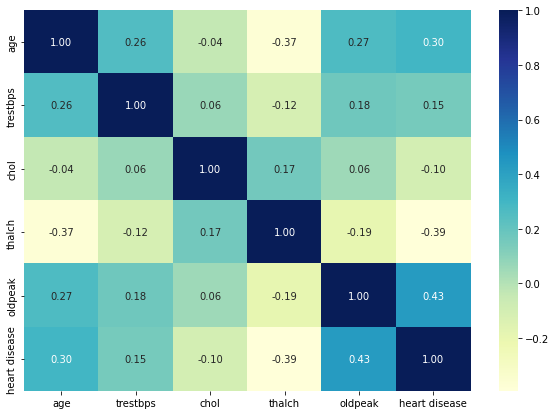

In [ ]:
# Visualize the correlation for all continuous variables
matrix= df[['age','trestbps','chol','thalch','oldpeak', 'heart disease']]
corr_matrix = matrix.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="YlGnBu")


- Old peak has the strongest positive correlation with heart disease.
- Thalch (maximum heart rate achieved) has the strongest negative correlation with heart disease.

In [ ]:
# Split the dataset into "presence of heart disease" and "absence of heart disease"
group = df.groupby('heart disease')
present_df = group.get_group(1)
absent_df = group.get_group(0)

## Visualize and Interpret the Distribution of Continuous Variables

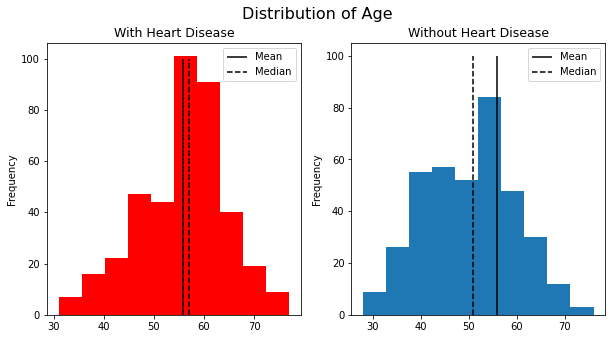

In [ ]:
a1 = present_df['age']
a1mean = present_df['age'].mean()
a1median = present_df['age'].median()
a2 = absent_df['age']
a2mean = absent_df['age'].mean()
a2median = absent_df['age'].median()

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1 = a1.plot(kind='hist', ax=axs[0], color='r')
a1_mean = ax1.vlines(a1mean, ymin=0, ymax=100, label='Mean')
a1_median = ax1.vlines(a1median, ymin=0, ymax=100, label='Median', linestyle='--')
ax1.set_title('With Heart Disease', size=12.5)
ax1.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[a1_mean, a1_median])

ax2 = a2.plot(kind='hist', ax=axs[1])
a2_mean = ax2.vlines(a1mean, ymin=0, ymax=100, label='Mean')
a2_median = ax2.vlines(a2median, ymin=0, ymax=100, label='Median', linestyle='--')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[a2_mean, a2_median])
fig.suptitle('Distribution of Age', size=16)
plt.show()

There is no significant difference observed in the distribution of age in people with or without heart disease. However, people of age between 55 and 65 appear to have a higher risk of getting heart disease.

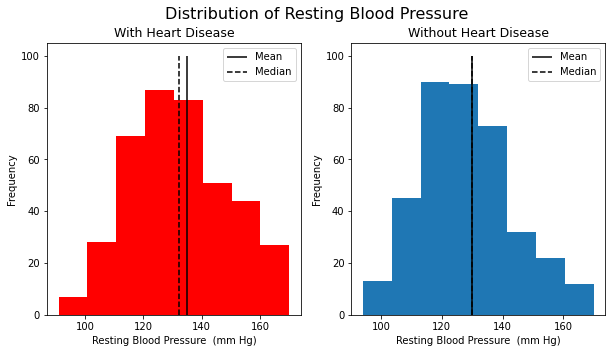

In [ ]:
b1 = present_df['trestbps']
b1mean = present_df['trestbps'].mean()
b1median = present_df['trestbps'].median()
b2 = absent_df['trestbps']
b2mean = absent_df['trestbps'].mean()
b2median = absent_df['trestbps'].median()

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1 = b1.plot(kind='hist', ax=axs[0], bins=8, color='r')
b1_mean = ax1.vlines(b1mean, ymin=0, ymax=100, label='Mean')
b1_median = ax1.vlines(b1median, ymin=0, ymax=100, label='Median', linestyle='--')
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Resting Blood Pressure  (mm Hg)')
ax1.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[b1_mean, b1_median])

ax2 = b2.plot(kind='hist', ax=axs[1], bins=8)
b2_mean = ax2.vlines(b2mean, ymin=0, ymax=100, label='Mean')
b2_median = ax2.vlines(b2median, ymin=0, ymax=100, label='Median', linestyle='--')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel('Resting Blood Pressure  (mm Hg)')
ax2.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[b2_mean, b2_median])
fig.suptitle('Distribution of Resting Blood Pressure', size=16)
plt.show()

The distribution of resting blood pressure in heart disease patients is right skewed, which means that a lot of patients have higher blood pressure values.

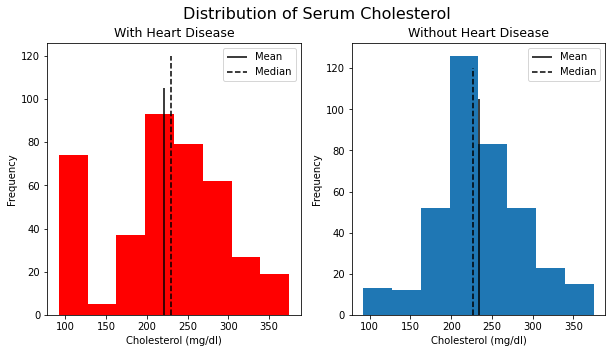

In [ ]:
c1 = present_df['chol']
c1mean = present_df['chol'].mean()
c1median = present_df['chol'].median()
c2 = absent_df['chol']
c2mean = absent_df['chol'].mean()
c2median = absent_df['chol'].median()

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1 = c1.plot(kind='hist', ax=axs[0], bins=8, color='r')
c1_mean = ax1.vlines(c1mean, ymin=0, ymax=105, label='Mean')
c1_median = ax1.vlines(c1median, ymin=0, ymax=120, label='Median', linestyle='--')
ax1.set_title('With Heart Disease', size=12.5)
ax1.set_xlabel('Cholesterol (mg/dl)')
ax1.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[c1_mean, c1_median])

ax2 = c2.plot(kind='hist', ax=axs[1], bins=8)
c2_mean = ax2.vlines(c2mean, ymin=0, ymax=105, label='Mean')
c2_median = ax2.vlines(c2median, ymin=0, ymax=120, label='Median', linestyle='--')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.set_xlabel('Cholesterol (mg/dl)')
ax2.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[c2_mean, c2_median])
fig.suptitle('Distribution of Serum Cholesterol', size=16)
plt.show()

A significant number of heart disease patients have low serum cholesterol (below 150 mg/dl). However, when comparing both distributions, we can see that there are more heart disease patients having high serum cholesterol, as shown by the median.

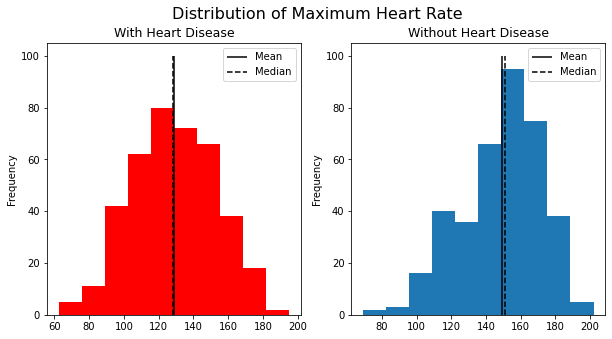

In [ ]:
d1 = present_df['thalch']
d1mean = present_df['thalch'].mean()
d1median = present_df['thalch'].median()
d2 = absent_df['thalch']
d2mean = absent_df['thalch'].mean()
d2median = absent_df['thalch'].median()

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1 = d1.plot(kind='hist', ax=axs[0], color='r')
d1_mean = ax1.vlines(d1mean, ymin=0, ymax=100, label='Mean')
d1_median = ax1.vlines(d1median, ymin=0, ymax=100, label='Median', linestyle='--')
ax1.set_title('With Heart Disease', size=12.5)
ax1.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[d1_mean, d1_median])

ax2 = d2.plot(kind='hist', ax=axs[1])
d2_mean = ax2.vlines(d2mean, ymin=0, ymax=100, label='Mean')
d2_median = ax2.vlines(d2median, ymin=0, ymax=100, label='Median', linestyle='--')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[d2_mean, d2_median])
fig.suptitle('Distribution of Maximum Heart Rate', size=16)
plt.show()

Heart disease patients generally have lower maximum heart rates (130) compared to those without heart disease (150).

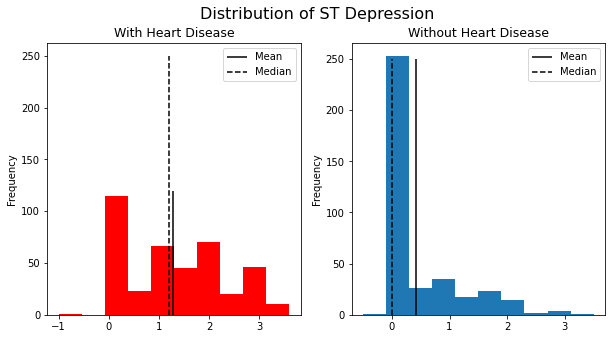

In [ ]:
e1 = present_df['oldpeak']
e1mean = present_df['oldpeak'].mean()
e1median = present_df['oldpeak'].median()
e2 = absent_df['oldpeak']
e2mean = absent_df['oldpeak'].mean()
e2median = absent_df['oldpeak'].median()

fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1 = e1.plot(kind='hist', ax=axs[0], color='r')
e1_mean = ax1.vlines(e1mean, ymin=0, ymax=120, label='Mean')
e1_median = ax1.vlines(e1median, ymin=0, ymax=250, label='Median', linestyle='--')
ax1.set_title('With Heart Disease', size=12.5)
ax1.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[e1_mean, e1_median])

ax2 = e2.plot(kind='hist', ax=axs[1])
e2_mean = ax2.vlines(e2mean, ymin=0, ymax=250, label='Mean')
e2_median = ax2.vlines(e2median, ymin=0, ymax=250, label='Median', linestyle='--')
ax2.set_title('Without Heart Disease', size=12.5)
ax2.legend(bbox_to_anchor = (1.0, 1), loc = 'up', handles=[e2_mean, e2_median])
fig.suptitle('Distribution of ST Depression', size=16)
plt.show()

ST Depression of heart disease patients ranges from -1 to around 3.5, while most people without heart disease have a ST Depression value of 0.

## Visualize and Interpret the Distribution of Categorical Variables

In [ ]:
# Categorize heart disease patients into male (1) and female (0)
presence=[]
for i in df['sex'].unique():
  print(i)
  presence.append(len(df[(df['sex']==i) & (df['heart disease']==1)]))

presence_percent=[k*100/sum(presence) for k in presence]
print(presence_percent)

1
0
[89.14141414141415, 10.858585858585858]


Text(0.5, 1.0, 'Percentage of Heart Disease Patients based on Gender')

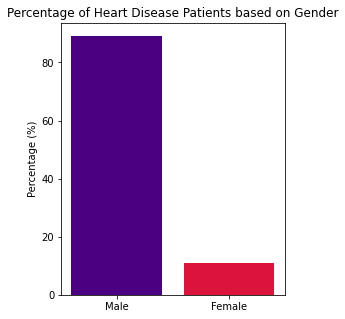

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(['Male', 'Female'], presence_percent, color = ['indigo', 'crimson'])
plt.ylabel('Percentage (%)')
plt.title('Percentage of Heart Disease Patients based on Gender')

Almost 90% of the heart disease patients are male.

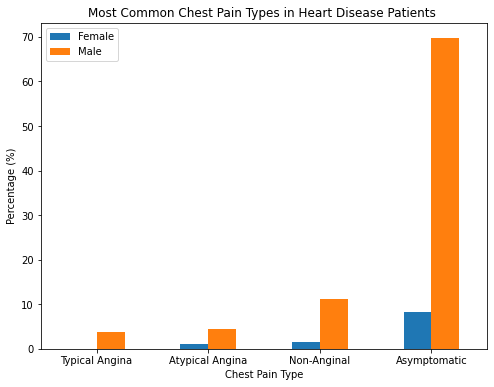

In [ ]:
chest = present_df.groupby(['cp', 'sex'])['heart disease'].count()
chest = (chest/chest.sum())*100

rcParams['figure.figsize'] = 8, 6
chest.unstack().plot(kind='bar')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage (%)')
plt.title("Most Common Chest Pain Types in Heart Disease Patients ")
plt.xticks([0, 1, 2, 3], labels=['Typical Angina','Atypical Angina','Non-Anginal', 'Asymptomatic'], rotation=0)
plt.legend(['Female', 'Male'])
plt.show()

Asymptomatic is the most common type of chest pain found in heart disease patients.

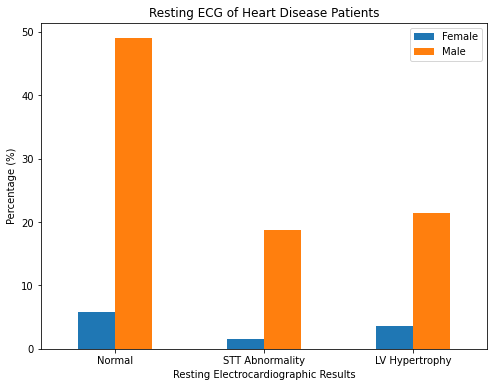

In [ ]:
rest = present_df.groupby(['restecg', 'sex'])['heart disease'].count()
rest = (rest/rest.sum())*100

rcParams['figure.figsize'] = 8, 6
rest.unstack().plot(kind='bar')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Percentage (%)')
plt.title("Resting ECG of Heart Disease Patients")
plt.xticks([0, 1, 2], labels=['Normal', 'STT Abnormality','LV Hypertrophy'], rotation=0)
plt.legend(['Female', 'Male'])
plt.show()

Most heart disease patients have normal resting ECG

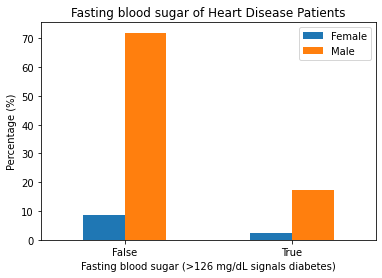

In [ ]:
fasting = present_df.groupby(['fbs', 'sex'])['heart disease'].count()
fasting = (fasting/fasting.sum())*100

rcParams['figure.figsize'] = 6, 4
fasting.unstack().plot(kind='bar')
plt.xlabel('Fasting blood sugar (>126 mg/dL signals diabetes)')
plt.ylabel('Percentage (%)')
plt.title("Fasting blood sugar of Heart Disease Patients")
plt.xticks([0, 1], labels=['False', 'True'], rotation=0)
plt.legend(['Female', 'Male'])
plt.show()



Most heart disease patients have less than 126 mg/dl of fasting blood sugar.

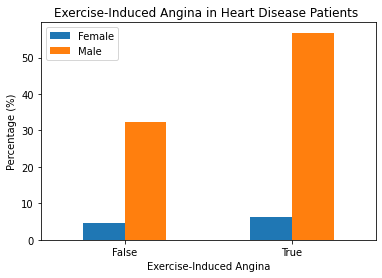

In [ ]:
exercise = present_df.groupby(['exang', 'sex'])['heart disease'].count()
exercise = (exercise/exercise.sum())*100

rcParams['figure.figsize'] = 6, 4
exercise.unstack().plot(kind='bar')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Percentage (%)')
plt.title("Exercise-Induced Angina in Heart Disease Patients ")
plt.xticks([0, 1], labels=['False', 'True'], rotation=0)
plt.legend(['Female', 'Male'])
plt.show()


More than 50% of patient have exercise-induced angina.

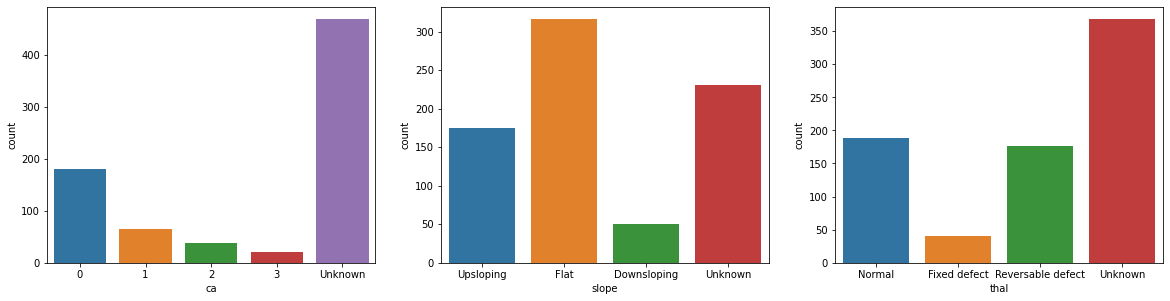

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(3, 3, 1)
df['ca'].value_counts()
sns.countplot(data=df, x='ca')
plt.xticks([0, 1, 2, 3, 4], labels=['0','1','2','3','Unknown'])

plt.subplot(3, 3, 2)
df['slope'].value_counts()
sns.countplot(data=df, x='slope')
plt.xticks([0, 1, 2, 3], labels=['Upsloping', 'Flat','Downsloping', 'Unknown'])

plt.subplot(3, 3, 3)
df['thal'].value_counts()
sns.countplot(data=df, x='thal')
plt.xticks([0, 1, 2, 3], labels=['Normal', 'Fixed defect','Reversable defect', 'Unknown'])

warnings.filterwarnings('ignore')

Since these features contain relatively high number of 'unknown', we are not going to draw any conclusion on them.

# Modelling

### Shuffle the dataset

In [9]:
# Before shuffling
df_ml.head() # Note: the continuous features had been scaled in Part 1 of this project

,age,trestbps,chol,thalch,oldpeak,heart disease,sex_0,sex_1,cp_3,cp_1,cp_2,cp_0,fbs_0,fbs_1,restecg_2,restecg_0,restecg_1,exang_0,exang_1,slope_2,slope_1,slope_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1,thal_0,thal_2
0,1.052551,0.742169,0.083947,0.438890,1.446854,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1.476537,1.631331,0.878638,-1.189416,0.643928,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2,1.476537,-0.739767,0.023970,-0.375263,1.747951,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.703359,-0.146993,0.338848,1.873351,2.651243,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,-1.279373,-0.146993,-0.350884,1.291813,0.543562,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [10]:
# Shuffle the dataset
from sklearn.utils import shuffle
df_ml = shuffle(df_ml, random_state=20).reset_index(drop=True) # so that it is reproducible

In [11]:
# After shuffling
df_ml.head()

,age,trestbps,chol,thalch,oldpeak,heart disease,sex_0,sex_1,cp_3,cp_1,cp_2,cp_0,fbs_0,fbs_1,restecg_2,restecg_0,restecg_1,exang_0,exang_1,slope_2,slope_1,slope_0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_1,thal_0,thal_2
0,1.370541,2.164828,0.008976,1.020429,0.142099,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
1,-1.279373,-1.213987,0.608743,1.291813,-0.861559,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
2,-1.067380,1.038556,0.293865,1.253044,0.643928,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
3,1.052551,-0.146993,1.538381,-0.258955,0.945025,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,-2.551331,-0.146993,-0.350884,2.454889,-0.861559,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0


### Split the dataset

In [31]:
# Separate Features(x) and Target Matrix(y)
df_ml_x = df_ml.drop('heart disease',axis = 1) 
df_ml_y = df_ml['heart disease']

In [32]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df_ml_x, df_ml_y, test_size=0.3,random_state=888) # 70% training and 30% test

### Train and test each model

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test):
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### K-Nearest Neighbors (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test)

Test Result:
Accuracy Score: 78.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.796296   0.777778  0.788889   0.787037      0.788272
recall      0.843137   0.717949  0.788889   0.780543      0.788889
f1-score    0.819048   0.746667  0.788889   0.782857      0.787683
support    51.000000  39.000000  0.788889  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[43  8]
 [11 28]]



#### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# Create new KNN object
knn_clf2 = KNeighborsClassifier()
# Use GridSearch
knn_cv = GridSearchCV(knn_clf2, hyperparameters, cv=10)
# Fit the model
best_model = knn_cv.fit(df_ml_x,df_ml_y)
best_params = knn_cv.best_params_
print(f"Best params: {best_params}")

Best params: {'leaf_size': 1, 'n_neighbors': 7, 'p': 2}


In [52]:
knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(x_train, y_train)
print_score(knn_clf, x_train, y_train, x_test, y_test)

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.800000       0.8   0.800000      0.800000
recall      0.862745   0.717949       0.8   0.790347      0.800000
f1-score    0.830189   0.756757       0.8   0.793473      0.798368
support    51.000000  39.000000       0.8  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[44  7]
 [11 28]]



In [53]:
knn_a_score = "{:.2f}".format(accuracy_score(y_train, knn_clf.predict(x_train)) * 100)

### Support Vector Machines (SVM)

In [24]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.905983    0.967391  0.933014    0.936687      0.935365
recall       0.972477    0.890000  0.933014    0.931239      0.933014
f1-score     0.938053    0.927083  0.933014    0.932568      0.932804
support    109.000000  100.000000  0.933014  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[106   3]
 [ 11  89]]

Test Result:
Accuracy Score: 81.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.803571   0.823529  0.811111   0.813550      0.812220
recall      0.882353   0.717949  0.811111   0.800151      0.811111
f1-score    0.841121   0.767123  0.811111   0.804122      0.809056
support    51.000000  39.000000  0.811111  90.000000     90.000000
________

#### Hyperparamater Tuning

In [49]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(x_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}


In [50]:
svm_clf = SVC(**best_params)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test)

Test Result:
Accuracy Score: 86.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.842105   0.909091  0.866667   0.875598      0.871132
recall      0.941176   0.769231  0.866667   0.855204      0.866667
f1-score    0.888889   0.833333  0.866667   0.861111      0.864815
support    51.000000  39.000000  0.866667  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[48  3]
 [ 9 30]]



In [54]:
svm_a_score = "{:.2f}".format(accuracy_score(y_train, svm_clf.predict(x_train)) * 100)

### Decision Tree (DT)

In [26]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=88)
tree_clf.fit(x_train, y_train)

print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  100.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 100]]

Test Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.714286   0.676471       0.7   0.695378      0.697899
recall      0.784314   0.589744       0.7   0.687029      0.700000
f1-score    0.747664   0.630137       0.7   0.688900      0.696735
support    51.000000  39.000000       0.7  90.000000     90.000000
_______________________________________________
Confusion Matr

#### Hyperparameter Tuning

In [56]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=88)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [58]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)

print_score(tree_clf, x_train, y_train, x_test, y_test)

Test Result:
Accuracy Score: 81.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.814815   0.805556  0.811111   0.810185      0.810802
recall      0.862745   0.743590  0.811111   0.803167      0.811111
f1-score    0.838095   0.773333  0.811111   0.805714      0.810032
support    51.000000  39.000000  0.811111  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[44  7]
 [10 29]]



In [60]:
tree_a_score = "{:.2f}".format(accuracy_score(y_train, tree_clf.predict(x_train)) * 100)

### Random Forest (RF)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=88)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  100.0       1.0      209.0         209.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 100]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.823529   0.769231       0.8    0.79638           0.8
recall      0.823529   0.769231       0.8    0.79638           0.8
f1-score    0.823529   0.769231       0.8    0.79638           0.8
support    51.000000  39.000000       0.8   90.00000          90.0
_______________________________________________
Confusion Matr

#### Hyperparameter Tuning

In [59]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }
rf_clf = RandomForestClassifier(random_state=88)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")            

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [61]:
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test)

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.811321   0.783784       0.8   0.797552      0.799388
recall      0.843137   0.743590       0.8   0.793363      0.800000
f1-score    0.826923   0.763158       0.8   0.795040      0.799291
support    51.000000  39.000000       0.8  90.000000     90.000000
_______________________________________________
Confusion Matrix: 
 [[43  8]
 [10 29]]



In [62]:
rf_a_score = "{:.2f}".format(accuracy_score(y_train, rf_clf.predict(x_train)) * 100)

In [65]:
# Summary of the accuracy scores
a_scores = [knn_a_score, svm_a_score, tree_a_score, rf_a_score]
accuracy = pd.DataFrame(a_scores, columns=['Accuracy Score'], index=['K-Nearest Neighbors', 'Support Vector Machines', 'Decision Tree', 'Random Forest'])
accuracy

,Accuracy Score
K-Nearest Neighbors,89.95
Support Vector Machines,90.91
Decision Tree,86.60
Random Forest,94.74
